# 데이터 로드

In [2]:
import pandas as pd
df = pd.read_csv('생활인구_최종.csv')
df

,연월,행정동코드,시군구명,행정동명,총생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,...,남자55세부터59세생활인구수,여자15세부터19세생활인구수,여자20세부터24세생활인구수,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수
0,202301,11110515,종로구,청운효자동,208800,9634,11075,9806,10162,11253,...,9933,7751,11176,12363,11523,13539,14089,15733,11325,12980
1,202301,11110530,종로구,사직동,378960,6374,10358,18806,21297,27602,...,18351,7635,18636,27670,26065,29879,24559,25181,18698,16940
2,202301,11110540,종로구,삼청동,81041,2946,6179,3869,4265,4904,...,4222,1929,5287,5303,4784,5360,4628,5050,3817,3894
3,202301,11110550,종로구,부암동,144951,6911,6836,6163,5355,7922,...,8431,7363,7841,6234,6065,9276,9272,11986,9526,10379
4,202301,11110560,종로구,평창동,185599,7851,8094,8505,6371,9131,...,12138,9044,7846,7381,7534,11898,11356,14133,13552,17029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13139,202507,11740650,강동구,성내2동,276466,7179,9795,14904,16482,19253,...,14347,7703,14554,20321,19354,19995,15840,16721,14701,16971
13140,202507,11740660,강동구,성내3동,331010,16015,15285,15422,17001,20290,...,18215,11204,15906,18469,18931,20645,20848,24492,18630,20722
13141,202507,11740685,강동구,길동,685665,21507,25518,32260,37000,44131,...,37852,22060,30201,40793,39740,47622,43008,48142,45793,48192
13142,202507,11740690,강동구,둔촌1동,272515,16897,8956,8220,10819,16988,...,13441,10567,11773,10038,13636,21974,24345,22504,15812,17690


In [3]:
df.columns

Index(['연월', '행정동코드', '시군구명', '행정동명', '총생활인구수', '남자15세부터19세생활인구수',
       '남자20세부터24세생활인구수', '남자25세부터29세생활인구수', '남자30세부터34세생활인구수',
       '남자35세부터39세생활인구수', '남자40세부터44세생활인구수', '남자45세부터49세생활인구수',
       '남자50세부터54세생활인구수', '남자55세부터59세생활인구수', '여자15세부터19세생활인구수',
       '여자20세부터24세생활인구수', '여자25세부터29세생활인구수', '여자30세부터34세생활인구수',
       '여자35세부터39세생활인구수', '여자40세부터44세생활인구수', '여자45세부터49세생활인구수',
       '여자50세부터54세생활인구수', '여자55세부터59세생활인구수'],
      dtype='object')

생활인구데이터가 202301-202507
광고를 진행하기 위해서는 앞으로의 생활인구를 예측하여 광고효율을 계산하여야 함으로 202301-202412의 데이터를 통하여 학습 진행
- 202301-202412데이터로 학습하여 202501-202512를 예측
- 실제 데이터인 202501-202507로 예측성능 검증 진행


데이터 필터링 진행
202301-202412

In [4]:
# '연월' 컬럼을 datetime 형식으로 변환
df['연월'] = pd.to_datetime(df['연월'], format='%Y%m')

# 2023년 1월부터 2024년 12월까지의 데이터만 필터링
filtered_df = df[(df['연월'] >= '2023-01-01') & (df['연월'] <= '2024-12-31')].copy()

# 예측 대상 컬럼 지정
target_columns = [
    '남자15세부터19세생활인구수', '남자20세부터24세생활인구수', '남자25세부터29세생활인구수',
    '남자30세부터34세생활인구수', '남자35세부터39세생활인구수', '남자40세부터44세생활인구수',
    '남자45세부터49세생활인구수', '남자50세부터54세생활인구수', '남자55세부터59세생활인구수',
    '여자15세부터19세생활인구수', '여자20세부터24세생활인구수', '여자25세부터29세생활인구수',
    '여자30세부터34세생활인구수', '여자35세부터39세생활인구수', '여자40세부터44세생활인구수',
    '여자45세부터49세생활인구수', '여자50세부터54세생활인구수', '여자55세부터59세생활인구수'
]

display(filtered_df.head())

,연월,행정동코드,시군구명,행정동명,총생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,...,남자55세부터59세생활인구수,여자15세부터19세생활인구수,여자20세부터24세생활인구수,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수
0,2023-01-01,11110515,종로구,청운효자동,208800,9634,11075,9806,10162,11253,...,9933,7751,11176,12363,11523,13539,14089,15733,11325,12980
1,2023-01-01,11110530,종로구,사직동,378960,6374,10358,18806,21297,27602,...,18351,7635,18636,27670,26065,29879,24559,25181,18698,16940
2,2023-01-01,11110540,종로구,삼청동,81041,2946,6179,3869,4265,4904,...,4222,1929,5287,5303,4784,5360,4628,5050,3817,3894
3,2023-01-01,11110550,종로구,부암동,144951,6911,6836,6163,5355,7922,...,8431,7363,7841,6234,6065,9276,9272,11986,9526,10379
4,2023-01-01,11110560,종로구,평창동,185599,7851,8094,8505,6371,9131,...,12138,9044,7846,7381,7534,11898,11356,14133,13552,17029


In [5]:
# 데이터 분할 기준 시점 설정
train_end_date = '2024-12-31'
test_start_date = '2025-01-01'
test_end_date = '2025-07-31'
forecast_end_date = '2025-12-31'


# 훈련 데이터 필터링 (202301 ~ 202412)
train_df = filtered_df[filtered_df['연월'] <= train_end_date].copy()

# 테스트 데이터 필터링 (202501 ~ 202507)
# 원본 데이터프레임에서 해당 기간을 필터링합니다.
test_df = df[(df['연월'] >= test_start_date) & (df['연월'] <= test_end_date)].copy()


# 행정동별 데이터 그룹화
grouped_train_data = train_df.groupby(['행정동코드', '행정동명'])
grouped_test_data = test_df.groupby(['행정동코드', '행정동명'])

# 각 행정동별 시계열 데이터 준비 예시 (첫 번째 행정동에 대해)
# 예시로 첫 번째 그룹의 데이터를 사용합니다. 실제 모델 학습 시에는 모든 그룹에 대해 반복해야 합니다.
for group_name, group_data in grouped_train_data:
    dong_code, dong_name = group_name
    print(f"Processing data for {dong_name} ({dong_code})")
    # 여기에서 각 행정동별 시계열 데이터를 추출하고 예측 모델 학습에 사용할 형식으로 변환합니다.
    # 예: group_data.set_index('연월')[target_columns]


display(train_df.head())
display(test_df.head())

Processing data for 청운효자동 (11110515)
Processing data for 사직동 (11110530)
Processing data for 삼청동 (11110540)
Processing data for 부암동 (11110550)
Processing data for 평창동 (11110560)
Processing data for 무악동 (11110570)
Processing data for 교남동 (11110580)
Processing data for 가회동 (11110600)
Processing data for 종로1.2.3.4가동 (11110615)
Processing data for 종로5.6가동 (11110630)
Processing data for 이화동 (11110640)
Processing data for 혜화동 (11110650)
Processing data for 창신1동 (11110670)
Processing data for 창신2동 (11110680)
Processing data for 창신3동 (11110690)
Processing data for 숭인1동 (11110700)
Processing data for 숭인2동 (11110710)
Processing data for 소공동 (11140520)
Processing data for 회현동 (11140540)
Processing data for 명동 (11140550)
Processing data for 필동 (11140570)
Processing data for 장충동 (11140580)
Processing data for 광희동 (11140590)
Processing data for 을지로동 (11140605)
Processing data for 신당동 (11140615)
Processing data for 다산동 (11140625)
Processing data for 약수동 (11140635)
Processing data for 청구동 (11140645)
Pr

,연월,행정동코드,시군구명,행정동명,총생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,...,남자55세부터59세생활인구수,여자15세부터19세생활인구수,여자20세부터24세생활인구수,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수
0,2023-01-01,11110515,종로구,청운효자동,208800,9634,11075,9806,10162,11253,...,9933,7751,11176,12363,11523,13539,14089,15733,11325,12980
1,2023-01-01,11110530,종로구,사직동,378960,6374,10358,18806,21297,27602,...,18351,7635,18636,27670,26065,29879,24559,25181,18698,16940
2,2023-01-01,11110540,종로구,삼청동,81041,2946,6179,3869,4265,4904,...,4222,1929,5287,5303,4784,5360,4628,5050,3817,3894
3,2023-01-01,11110550,종로구,부암동,144951,6911,6836,6163,5355,7922,...,8431,7363,7841,6234,6065,9276,9272,11986,9526,10379
4,2023-01-01,11110560,종로구,평창동,185599,7851,8094,8505,6371,9131,...,12138,9044,7846,7381,7534,11898,11356,14133,13552,17029


,연월,행정동코드,시군구명,행정동명,총생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,...,남자55세부터59세생활인구수,여자15세부터19세생활인구수,여자20세부터24세생활인구수,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수
10176,2025-01-01,11110515,종로구,청운효자동,182413,8280,8262,8520,8266,10070,...,8455,7565,9154,10736,10518,13021,12642,13499,11546,10798
10177,2025-01-01,11110530,종로구,사직동,386007,5908,10825,17710,21143,25139,...,19750,8312,19570,28346,27138,29815,26729,26907,20990,18157
10178,2025-01-01,11110540,종로구,삼청동,82711,2941,6190,4310,3893,5475,...,4145,1607,4742,5746,4704,5431,4648,4925,4092,3940
10179,2025-01-01,11110550,종로구,부암동,127497,5885,6231,5743,4750,6850,...,7989,5093,6726,6175,6137,7291,8768,10242,8444,9226
10180,2025-01-01,11110560,종로구,평창동,177581,7663,10166,6573,5997,8529,...,11662,8571,7669,6903,7221,10587,11459,12740,13484,15947


In [7]:
from prophet import Prophet
import logging
logging.getLogger('cmdstanpy').setLevel(logging.ERROR) # Suppress cmdstanpy warnings

# 결과를 저장할 딕셔너리 초기화
all_forecasts = {}
all_test_data = {}

# 각 행정동별로 반복
for group_name, group_data in grouped_train_data:
    dong_code, dong_name = group_name
    print(f"Training models for {dong_name} ({dong_code})")

    # 해당 행정동의 테스트 데이터 추출
    # test_df는 이미 202501-202507 기간으로 필터링되어 있습니다.
    # 따라서 단순히 행정동 코드로 필터링합니다.
    dong_test_data = test_df[test_df['행정동코드'] == dong_code].set_index('연월')


    # 각 예측 대상 컬럼에 대해 반복
    for column in target_columns:
        print(f"  Processing column: {column}")

        # 훈련 데이터 준비 (Prophet 모델 요구 형식: 'ds', 'y')
        train_data = group_data[['연월', column]].rename(columns={'연월': 'ds', column: 'y'})

        # Prophet 모델 초기화 및 훈련 (changepoint 탐지 비활성화)
        model = Prophet(n_changepoints=0, yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
        model.fit(train_data)

        # 예측할 미래 데이터프레임 생성 (2025년 1월부터 12월까지)
        future = model.make_future_dataframe(periods=12, freq='MS')
        future = future[future['ds'] >= test_start_date] # Filter to start from 2025-01-01
        future = future[future['ds'] <= forecast_end_date] # 2025년 12월까지로 제한


        # 예측 수행
        forecast = model.predict(future)

        # 예측 결과 저장
        if group_name not in all_forecasts:
            all_forecasts[group_name] = {}
        all_forecasts[group_name][column] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

        # 해당 행정동 및 컬럼의 테스트 데이터 저장 (평가용)
        if group_name not in all_test_data:
             all_test_data[group_name] = {}
        if column in dong_test_data.columns:
            all_test_data[group_name][column] = dong_test_data[[column]]

        # 예시를 위해 첫 번째 행정동의 첫 번째 컬럼만 처리하고 중단합니다.
        # 실제 작업 시에는 아래 break 문을 제거해야 합니다.
        # break # Removed break
    # break # Removed break

print("\nForecasts generated for the first administrative district and the first target column.")

# 생성된 예측 결과 중 일부를 확인 (첫 번째 행정동, 첫 번째 컬럼)
first_dong_name = list(grouped_train_data.groups.keys())[0]
first_column = target_columns[0]

if first_dong_name in all_forecasts and first_column in all_forecasts[first_dong_name]:
    print(f"\nSample forecast for {first_dong_name[1]} ({first_dong_name[0]}) - {first_column}:")
    display(all_forecasts[first_dong_name][first_column].head())
else:
    print("\nNo forecast generated for the first administrative district and the first target column (check break statements).")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  Processing column: 남자15세부터19세생활인구수
  Processing column: 남자20세부터24세생활인구수
  Processing column: 남자25세부터29세생활인구수
  Processing column: 남자30세부터34세생활인구수
  Processing column: 남자35세부터39세생활인구수
  Processing column: 남자40세부터44세생활인구수
  Processing column: 남자45세부터49세생활인구수
  Processing column: 남자50세부터54세생활인구수
  Processing column: 남자55세부터59세생활인구수
  Processing column: 여자15세부터19세생활인구수
  Processing column: 여자20세부터24세생활인구수
  Processing column: 여자25세부터29세생활인구수
  Processing column: 여자30세부터34세생활인구수
  Processing column: 여자35세부터39세생활인구수
  Processing column: 여자40세부터44세생활인구수
  Processing column: 여자45세부터49세생활인구수
  Processing column: 여자50세부터54세생활인구수
  Processing column: 여자55세부터59세생활인구수
Training models for 하계1동 (11350611)
  Processing column: 남자15세부터19세생활인구수
  Processing column: 남자20세부터24세생활인구수
  Processing column: 남자25세부터29세생활인구수
  Processing column: 남자30세부터34세생활인구수
  Processing column: 남자35세부터39세생활인구수
  Processing column: 남자40세부터44세생활인구수
  Processing column: 남자45세부터49세생활인구수
  P

,ds,yhat,yhat_lower,yhat_upper
0,2025-01-01,8294.032336,8125.770427,8452.715467
1,2025-02-01,7818.974898,7648.868424,7995.214516
2,2025-03-01,12666.991099,12512.972622,12829.109564
3,2025-04-01,13286.387481,13119.759338,13455.913203
4,2025-05-01,13259.636813,13091.381570,13433.357181


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)

Evaluation Metrics for 청운효자동 (11110515) - 남자15세부터19세생활인구수:
  MAE: 515.60
  RMSE: 671.68


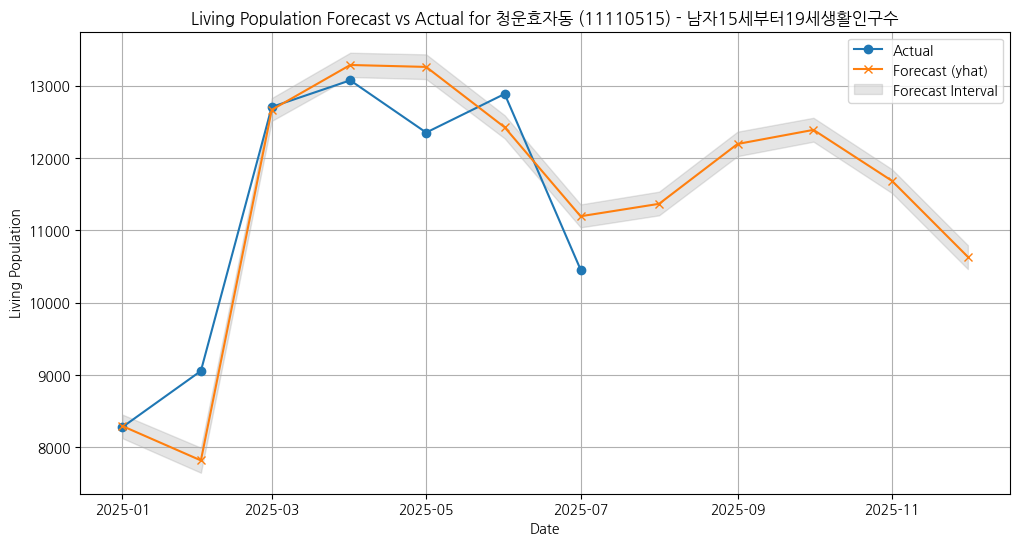

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Install a Korean font
!apt-get update -qq
!apt-get install fonts-nanum -qq > /dev/null

# Configure matplotlib to use the Korean font
fe = fm.FontEntry(
    fname='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.family': 'NanumGothic'})


# 첫 번째 행정동 및 첫 번째 컬럼에 대한 예측 결과 및 실제 테스트 데이터 가져오기
first_dong_name = list(grouped_train_data.groups.keys())[0]
first_column = target_columns[0]

if first_dong_name in all_forecasts and first_column in all_forecasts[first_dong_name] and first_dong_name in all_test_data and first_column in all_test_data[first_dong_name]:

    forecast_df = all_forecasts[first_dong_name][first_column].set_index('ds')
    actual_data = all_test_data[first_dong_name][first_column]

    # 예측 결과와 실제 테스트 데이터 결합 (날짜 기준)
    # Prophet 예측 결과에는 'yhat' (예측값), 'yhat_lower', 'yhat_upper'가 포함됩니다.
    # 실제 데이터는 해당 컬럼명으로 되어 있습니다.
    comparison_df = actual_data.join(forecast_df[['yhat', 'yhat_lower', 'yhat_upper']], how='inner')


    # 평가 지표 계산 (실제 데이터가 있는 기간에 대해서만)
    if not comparison_df.empty:
        actual_values = comparison_df[first_column]
        predicted_values = comparison_df['yhat']

        mae = mean_absolute_error(actual_values, predicted_values)
        rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

        print(f"\nEvaluation Metrics for {first_dong_name[1]} ({first_dong_name[0]}) - {first_column}:")
        print(f"  MAE: {mae:.2f}")
        print(f"  RMSE: {rmse:.2f}")

        # 시각화
        plt.figure(figsize=(12, 6))
        plt.plot(actual_data.index, actual_data[first_column], label='Actual', marker='o')
        plt.plot(forecast_df.index, forecast_df['yhat'], label='Forecast (yhat)', marker='x')
        plt.fill_between(forecast_df.index, forecast_df['yhat_lower'], forecast_df['yhat_upper'], color='gray', alpha=0.2, label='Forecast Interval')
        plt.title(f'Living Population Forecast vs Actual for {first_dong_name[1]} ({first_dong_name[0]}) - {first_column}')
        plt.xlabel('Date')
        plt.ylabel('Living Population')
        plt.legend()
        plt.grid(True)
        plt.show()

    else:
        print(f"\nNo overlapping dates between forecast and test data for {first_dong_name[1]} ({first_dong_name[0]}) - {first_column} for evaluation.")

else:
    print("\nForecast or test data not found for the first administrative district and the first target column.")


Evaluation Metrics for 청운효자동 (11110515) - 남자15세부터19세생활인구수:
  R2: 0.8662
  MAE: 515.60
  RMSE: 671.68


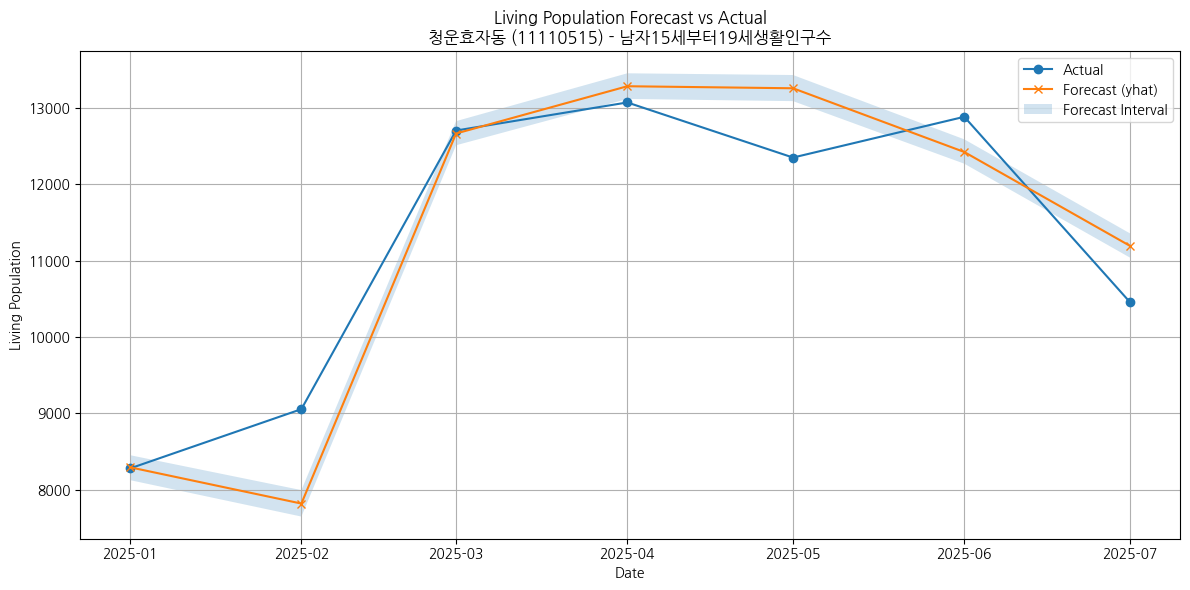

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

# (Colab일 때만) 한글 폰트 설치
# !apt-get update -qq
# !apt-get install fonts-nanum -qq > /dev/null

# 한글 폰트 설정 (설치 경로가 다르면 수정)
try:
    fe = fm.FontEntry(fname='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic')
    fm.fontManager.ttflist.insert(0, fe)
    plt.rcParams.update({'font.family': 'NanumGothic'})
except Exception:
    pass  # 폰트 없으면 기본 폰트 사용

# 첫 번째 행정동 및 첫 번째 컬럼
first_dong_name = list(grouped_train_data.groups.keys())[0]
first_column = target_columns[0]

if (
    first_dong_name in all_forecasts
    and first_column in all_forecasts[first_dong_name]
    and first_dong_name in all_test_data
    and first_column in all_test_data[first_dong_name]
):

    # 예측/실측 DataFrame 준비
    forecast_df = all_forecasts[first_dong_name][first_column].copy()
    forecast_df = forecast_df.set_index('ds')
    actual_data = all_test_data[first_dong_name][first_column].copy()

    # 인덱스 타입 정합성 (datetime으로 통일)
    forecast_df.index = pd.to_datetime(forecast_df.index)
    actual_data.index = pd.to_datetime(actual_data.index)

    # 겹치는 날짜만 비교
    comparison_df = actual_data.join(
        forecast_df[['yhat', 'yhat_lower', 'yhat_upper']],
        how='inner'
    )

    if not comparison_df.empty:
        actual_values = comparison_df[first_column].astype(float)
        predicted_values = comparison_df['yhat'].astype(float)

        mae = mean_absolute_error(actual_values, predicted_values)
        rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
        R2 = r2_score(actual_values, predicted_values)

        print(f"\nEvaluation Metrics for {first_dong_name[1]} ({first_dong_name[0]}) - {first_column}:")
        print(f"  R2: {R2:.4f}")
        print(f"  MAE: {mae:.2f}")
        print(f"  RMSE: {rmse:.2f}")

        # === 시각화: 평가 구간(겹치는 날짜)만 표시 ===
        plt.figure(figsize=(12, 6))
        plt.plot(comparison_df.index, comparison_df[first_column], label='Actual', marker='o')
        plt.plot(comparison_df.index, comparison_df['yhat'], label='Forecast (yhat)', marker='x')
        plt.fill_between(
            comparison_df.index,
            comparison_df['yhat_lower'],
            comparison_df['yhat_upper'],
            alpha=0.2, label='Forecast Interval'
        )
        plt.title(f'Living Population Forecast vs Actual\n{first_dong_name[1]} ({first_dong_name[0]}) - {first_column}')
        plt.xlabel('Date')
        plt.ylabel('Living Population')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    else:
        print(f"\nNo overlapping dates between forecast and test data for {first_dong_name[1]} ({first_dong_name[0]}) - {first_column} for evaluation.")

else:
    print("\nForecast or test data not found for the first administrative district and the first target column.")


In [ ]:
# 결과를 저장할 빈 데이터프레임 리스트 생성
final_output_list = []

# 각 행정동별로 반복
for group_name, forecasts_by_column in all_forecasts.items():
    dong_code, dong_name = group_name

    # 해당 행정동의 모든 컬럼별 예측 결과를 저장할 딕셔너리 초기화
    dong_forecast_data_frames = {}

    # 각 예측 대상 컬럼에 대해 반복
    for column, forecast_df in forecasts_by_column.items():
        # 예측 결과 데이터프레임이 유효하고 'yhat' 컬럼을 가지고 있는지 확인
        if isinstance(forecast_df, pd.DataFrame) and 'yhat' in forecast_df.columns:
            # 'ds'를 datetime으로 변환하여 연월 컬럼으로 사용
            # 예측값('yhat')만 선택하고 컬럼 이름을 원래 생활인구수 컬럼 이름으로 변경
            forecast_df['연월'] = pd.to_datetime(forecast_df['ds'])
            dong_forecast_data_frames[column] = forecast_df[['연월', 'yhat']].rename(columns={'yhat': column})
        # else:
            # print(f"Warning: Invalid or missing forecast data for {dong_name} ({dong_code}) - {column}") # Optional warning


    # 해당 행정동의 모든 컬럼별 예측 결과를 '연월'을 기준으로 병합
    merged_dong_df = None
    first_column_processed = False

    for column in target_columns:
        # 해당 컬럼의 예측 결과 데이터프레임이 존재하는지 확인
        if column in dong_forecast_data_frames and dong_forecast_data_frames[column] is not None:
            if not first_column_processed:
                merged_dong_df = dong_forecast_data_frames[column]
                first_column_processed = True
            else:
                merged_dong_df = pd.merge(merged_dong_df, dong_forecast_data_frames[column], on='연월', how='outer')
        # else:
            # print(f"Warning: Forecast data frame not found or is None for merging {dong_name} ({dong_code}) - {column}") # Optional warning


    # 행정동 정보 컬럼 추가
    if merged_dong_df is not None and not merged_dong_df.empty:
        merged_dong_df['행정동코드'] = dong_code
        merged_dong_df['행정동명'] = dong_name

        # 최종 출력 리스트에 추가
        final_output_list.append(merged_dong_df)
    # else:
        # print(f"Warning: Merged DataFrame is None or empty for {dong_name} ({dong_code})") # Optional warning


# 모든 행정동의 결과를 하나의 데이터프레임으로 결합
if final_output_list:
    final_output_df = pd.concat(final_output_list, ignore_index=True)

    # 컬럼 순서 재배치 (연월, 행정동코드, 행정동명 먼저 오도록)
    # target_columns 순서대로 생활인구수 컬럼 배치
    cols = ['연월', '행정동코드', '행정동명'] + target_columns
    # 실제 데이터프레임에 존재하는 컬럼만 선택
    cols = [col for col in cols if col in final_output_df.columns]

    final_output_df = final_output_df[cols]

    # 연월 컬럼을 원래 형식(YYYYMM)으로 변환
    final_output_df['연월'] = final_output_df['연월'].dt.strftime('%Y%m')

    print("전체 예측 결과 (원본 데이터프레임 형식):")
    display(final_output_df)
else:
    print("예측 결과가 없습니다. (예측 코드가 실행되었는지 확인하세요)")

전체 예측 결과 (원본 데이터프레임 형식):


/tmp/ipython-input-250678217.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_df['연월'] = pd.to_datetime(forecast_df['ds'])


,연월,행정동코드,행정동명,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,남자40세부터44세생활인구수,남자45세부터49세생활인구수,...,남자55세부터59세생활인구수,여자15세부터19세생활인구수,여자20세부터24세생활인구수,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수
0,202501,11110515,청운효자동,8294.032336,7115.845714,9098.684990,7422.435883,11312.888922,8917.208826,11983.481415,...,8712.058601,7705.144732,11219.090567,9916.518936,10771.696692,13115.237709,12267.665324,14006.238828,11769.804372,10390.298180
1,202502,11110515,청운효자동,7818.974898,7122.738384,9060.126560,8178.081111,10898.192139,9483.868209,12810.701181,...,8316.179985,9328.595962,11189.668902,12670.100725,11857.302184,15380.861474,13370.539081,13814.587633,12217.032231,11784.628810
2,202503,11110515,청운효자동,12666.991099,6855.650647,9180.112363,8488.110025,11610.681732,9661.221498,12315.838615,...,8794.562667,15230.734162,12634.284789,12386.412868,12155.356943,14695.525383,13351.369378,14381.060001,12922.311165,11421.555191
3,202504,11110515,청운효자동,13286.387481,6779.868085,9367.702371,8529.048016,11834.950977,9742.591958,12412.805282,...,8884.326392,15429.352195,12867.713897,12370.733492,12407.909044,14981.035126,13766.550650,14932.393044,13198.847345,11675.667635
4,202505,11110515,청운효자동,13259.636813,7001.568459,9435.643020,8464.362071,11945.206092,9587.311027,12101.896570,...,8890.389673,15461.404100,13254.703935,11825.445227,12373.511679,14890.948119,13540.343273,14832.453008,13207.433319,11463.432146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5083,202508,11740700,둔촌2동,11157.747245,10385.229595,13111.076466,13682.806275,18950.831523,16389.245597,18036.160827,...,16093.016920,11101.112700,13310.027999,13847.714536,13540.828578,18826.391556,15523.197367,20469.324095,18308.941265,20411.991708
5084,202509,11740700,둔촌2동,10738.710993,9108.700831,12985.919197,13376.224251,18966.722640,16076.463636,17854.388046,...,15610.017363,11004.789328,12004.741751,13443.398445,13389.155733,18027.206188,15573.743314,20206.425528,18030.028668,19892.512836
5085,202510,11740700,둔촌2동,10821.743501,9115.034596,12741.514572,13496.919307,19271.452255,15884.633877,17881.528628,...,15163.088037,11010.662050,12278.545543,13620.458758,13683.097087,18003.891695,15530.693968,20333.409127,18265.689737,19733.100621
5086,202511,11740700,둔촌2동,11132.007876,9456.649644,12774.484582,13842.885962,19736.485536,15894.363753,18283.377733,...,15386.718398,11296.706927,11979.093703,13850.928244,14441.363985,18726.218338,15895.346441,20779.591452,18468.108771,20270.278118


In [ ]:
# 원본 데이터에서 202501-202507 기간의 데이터 필터링
# test_df가 이미 해당 기간을 포함하고 있습니다.
original_2025_01_07 = test_df.copy()

# final_output_df에서 202501-202507 기간의 예측 결과 필터링
# '연월' 컬럼이 문자열 YYYYMM 형식으로 되어 있으므로 비교를 위해 변환
final_output_2025_01_07 = final_output_df[
    (final_output_df['연월'] >= '202501') & (final_output_df['연월'] <= '202507')
].copy()

# 비교를 위해 두 데이터프레임의 컬럼을 맞추고 정렬
# 실제 비교할 컬럼은 target_columns에 해당
original_2025_01_07 = original_2025_01_07[['연월', '행정동코드', '행정동명'] + target_columns].sort_values(by=['연월', '행정동코드']).reset_index(drop=True)
final_output_2025_01_07 = final_output_2025_01_07[['연월', '행정동코드', '행정동명'] + target_columns].sort_values(by=['연월', '행정동코드']).reset_index(drop=True)


print("원본 데이터 (202501-202507):")
display(original_2025_01_07.head())

print("\nfinal_output_df 예측 결과 (202501-202507):")
display(final_output_2025_01_07.head())

# 필요하다면 두 데이터프레임의 차이를 계산하거나 시각적으로 비교할 수 있습니다.
# 예: (final_output_2025_01_07[target_columns] - original_2025_01_07[target_columns]).abs().mean()

원본 데이터 (202501-202507):


,연월,행정동코드,행정동명,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,남자40세부터44세생활인구수,남자45세부터49세생활인구수,...,남자55세부터59세생활인구수,여자15세부터19세생활인구수,여자20세부터24세생활인구수,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수
0,2025-01-01,11110515,청운효자동,8280,8262,8520,8266,10070,9430,11184,...,8455,7565,9154,10736,10518,13021,12642,13499,11546,10798
1,2025-01-01,11110530,사직동,5908,10825,17710,21143,25139,27119,27176,...,19750,8312,19570,28346,27138,29815,26729,26907,20990,18157
2,2025-01-01,11110540,삼청동,2941,6190,4310,3893,5475,5672,5515,...,4145,1607,4742,5746,4704,5431,4648,4925,4092,3940
3,2025-01-01,11110550,부암동,5885,6231,5743,4750,6850,6389,6961,...,7989,5093,6726,6175,6137,7291,8768,10242,8444,9226
4,2025-01-01,11110560,평창동,7663,10166,6573,5997,8529,9277,10875,...,11662,8571,7669,6903,7221,10587,11459,12740,13484,15947



final_output_df 예측 결과 (202501-202507):


,연월,행정동코드,행정동명,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,남자40세부터44세생활인구수,남자45세부터49세생활인구수,...,남자55세부터59세생활인구수,여자15세부터19세생활인구수,여자20세부터24세생활인구수,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수
0,202501,11110515,청운효자동,8294.032336,7115.845714,9098.684990,7422.435883,11312.888922,8917.208826,11983.481415,...,8712.058601,7705.144732,11219.090567,9916.518936,10771.696692,13115.237709,12267.665324,14006.238828,11769.804372,10390.298180
1,202501,11110530,사직동,7448.708064,8998.423129,13492.070786,17669.496645,22059.968231,20253.990334,23610.670399,...,17206.472225,7737.515156,18244.879662,22496.544934,23405.537864,29335.669760,24394.610425,23400.069508,19701.664671,14293.510654
2,202501,11110540,삼청동,2543.619625,12104.939448,3944.305155,3736.185408,4936.915031,6049.898123,5234.587400,...,4327.852105,2605.684764,4881.897102,5522.189375,5273.166542,5083.285574,5141.083338,6272.954022,4428.714279,4412.569057
3,202501,11110550,부암동,4101.751301,7738.966389,5495.491105,4707.345918,6618.716325,8208.706269,6814.615196,...,7178.994485,7861.586055,7147.954261,3334.159034,5721.511343,7235.624860,8265.423128,9901.019733,8570.697413,8082.446570
4,202501,11110560,평창동,8495.759470,8120.898393,6308.266290,5880.344454,10801.290712,8999.789932,10912.247233,...,11542.068940,10864.562200,9622.530407,6320.038607,7709.262036,11324.602851,10835.967844,12742.608177,13097.740551,15765.103568


In [ ]:
final_output_df['총생활인구수'] = final_output_df[[
    '남자15세부터19세생활인구수', '남자20세부터24세생활인구수', '남자25세부터29세생활인구수',
    '남자30세부터34세생활인구수', '남자35세부터39세생활인구수', '남자40세부터44세생활인구수',
    '남자45세부터49세생활인구수', '남자50세부터54세생활인구수', '남자55세부터59세생활인구수',
    '여자15세부터19세생활인구수', '여자20세부터24세생활인구수', '여자25세부터29세생활인구수',
    '여자30세부터34세생활인구수', '여자35세부터39세생활인구수', '여자40세부터44세생활인구수',
    '여자45세부터49세생활인구수', '여자50세부터54세생활인구수', '여자55세부터59세생활인구수'
]].sum(axis=1)


In [ ]:
# 모든 숫자 컬럼을 선택하여 소수점에서 반올림
# '연월', '행정동코드', '행정동명' 컬럼은 제외
cols_to_round = final_output_df.columns.difference(['연월', '행정동코드', '행정동명'])

# 선택된 컬럼에 대해 반올림 적용
for col in cols_to_round:
    # 컬럼이 숫자형인지 확인 후 반올림
    if pd.api.types.is_numeric_dtype(final_output_df[col]):
        final_output_df[col] = final_output_df[col].round(0).astype(int) # 반올림 후 정수형 변환

print("컬럼 순서 변경 및 수치 반올림이 적용된 최종 예측 결과:")
display(final_output_df.head())

컬럼 순서 변경 및 수치 반올림이 적용된 최종 예측 결과:


/tmp/ipython-input-2370772431.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_output_df[col] = final_output_df[col].round(0).astype(int) # 반올림 후 정수형 변환
/tmp/ipython-input-2370772431.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_output_df[col] = final_output_df[col].round(0).astype(int) # 반올림 후 정수형 변환
/tmp/ipython-input-2370772431.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,연월,행정동코드,행정동명,총생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,남자40세부터44세생활인구수,...,남자55세부터59세생활인구수,여자15세부터19세생활인구수,여자20세부터24세생활인구수,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수
0,202501,11110515,청운효자동,185095,8294,7116,9099,7422,11313,8917,...,8712,7705,11219,9917,10772,13115,12268,14006,11770,10390
1,202502,11110515,청운효자동,194910,7819,7123,9060,8178,10898,9484,...,8316,9329,11190,12670,11857,15381,13371,13815,12217,11785
2,202503,11110515,청운효자동,209789,12667,6856,9180,8488,11611,9661,...,8795,15231,12634,12386,12155,14696,13351,14381,12922,11422
3,202504,11110515,청운효자동,213643,13286,6780,9368,8529,11835,9743,...,8884,15429,12868,12371,12408,14981,13767,14932,13199,11676
4,202505,11110515,청운효자동,212746,13260,7002,9436,8464,11945,9587,...,8890,15461,13255,11825,12374,14891,13540,14832,13207,11463


In [ ]:
final_output_df.to_csv('생활인구_2025.csv',index=False)